                         10        100        1000
f0 n                   1.0000    2.0000     3.0000
f1 1.5^n               1.7609   17.6091   176.0913
f2 8n^3 + 17n^2 + 111  3.9917    6.9122     9.9040
f3 log(n)^2            0.7244    1.3265     1.6787
f4 2^n                 3.0103   30.1030   301.0300
f5 log(log(n))        -0.0788    0.1839     0.2862
f6 n^2log(n)^3         3.0866    5.9897     8.5180
f7 2^n(n^2 + 1)        5.0146   34.1030   307.0300
f8 n^3 + nlog(n)^2     3.0224    6.0009     9.0000
f9 10000               4.0000    4.0000     4.0000
f10 n!                 6.5598  157.9700  2567.6046
f11 n^2.7              2.7000    5.4000     8.1000
f12 n^1.6              1.6000    3.2000     4.8000
f13 n^2.81             2.8100    5.6200     8.4300


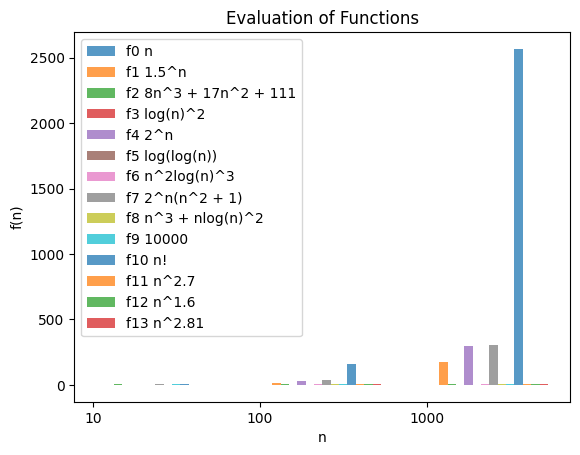

                         10        100        1000
f5 log(log(n))        -0.0788    0.1839     0.2862
f3 log(n)^2            0.7244    1.3265     1.6787
f0 n                   1.0000    2.0000     3.0000
f9 10000               4.0000    4.0000     4.0000
f12 n^1.6              1.6000    3.2000     4.8000
f11 n^2.7              2.7000    5.4000     8.1000
f13 n^2.81             2.8100    5.6200     8.4300
f6 n^2log(n)^3         3.0866    5.9897     8.5180
f8 n^3 + nlog(n)^2     3.0224    6.0009     9.0000
f2 8n^3 + 17n^2 + 111  3.9917    6.9122     9.9040
f1 1.5^n               1.7609   17.6091   176.0913
f4 2^n                 3.0103   30.1030   301.0300
f7 2^n(n^2 + 1)        5.0146   34.1030   307.0300
f10 n!                 6.5598  157.9700  2567.6046


In [1]:
import pandas as pd
import inspect
from math import factorial, log
import matplotlib.pyplot as plt

# [1] Extract the return expression from a function's source code
def func_body(f):
    body = inspect.getsource(f)
    idx = body.index("return")
    return body[7 + idx:].strip()

# Clean up expression string for display
def clean(s):
    return s.replace("**", "^").replace(" * ", "").replace("fact(n)", "n!").strip()

# Basic factorial function used by f10
def fact(n):
    return factorial(n)

# Define several mathematical functions to compare their growth rates
def f0(n): return n

def f1(n): return 1.5**n

def f2(n): return 8 * n**3 + 17 * n**2 + 111

def f3(n): return log(n)**2

def f4(n): return 2**n

def f5(n): return log(log(n))

def f6(n): return n**2 * log(n)**3

def f7(n): return 2**n * (n**2 + 1)

def f8(n): return n**3 + n * log(n)**2

def f9(n): return 10000

def f10(n): return fact(n)

def f11(n): return n**2.7

def f12(n): return n**1.6

def f13(n): return n**2.81

# Describe function in readable string
def func_desc(f):
    return f.__name__ + " " + clean(func_body(f))

# Evaluate each function at multiple sizes and store log-scale results
def eval_functions(functions, sizes):
    dict_functions = {}
    for func in functions:
        dict_functions[func_desc(func)] = {}
    for size in sizes:
        for func in functions:
            dict_functions[func_desc(func)][size] = round(log(func(size), 10), 4)
    return dict_functions

# Print and optionally sort function values
def print_values(dict_functions, do_sort, filename):
    pd.set_option("display.max_rows", 500)
    pd.set_option("display.max_columns", 500)
    pd.set_option("display.width", 1000)
    df = pd.DataFrame.from_dict(dict_functions).T
    if do_sort:
        df = df.sort_values(by=df.columns[2])
    print(df)
    with open(filename, "a") as f:
        f.write(df.to_string())
        f.write("\n")

# Plot bar chart comparing function growth rates
def plot_values(dict_functions, sizes, functions, xlabel, ylabel, file_name):
    func_num = 0
    plt.xticks([j for j in range(len(sizes))], [str(size) for size in sizes])
    for func in functions:
        func_num += 1
        d = dict_functions[func_desc(func)]
        x_axis = [j + 0.05 * func_num for j in range(len(sizes))]
        y_axis = [d[i] for i in sizes]
        plt.bar(x_axis, y_axis, width=0.05, alpha=0.75, label=func_desc(func))
    plt.legend()
    plt.title("Evaluation of Functions")
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.savefig(file_name)
    plt.show()

# Main execution entry point
def main():
    assn = "assignment05"
    sizes = [10, 100, 1000]
    functions = [f0, f1, f2, f3, f4, f5, f6, f7, f8, f9, f10, f11, f12, f13]
    dict_functions = eval_functions(functions, sizes)

    open(f"{assn}.txt", "w").close()
    print_values(dict_functions, False, f"{assn}.txt")
    plot_values(dict_functions, sizes, functions, "n", "f(n)", f"{assn}.png")
    print_values(dict_functions, True, f"{assn}.txt")

if __name__ == "__main__":
    main()
